In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# This magic line will allow you to generate plots
# within the Jupyter notebook.
%matplotlib inline

#this adds some extra styling to the graphs we will make
sns.set_style("whitegrid")

In [4]:
global_temp=pd.read_csv("GlobalLandTemperatures_GlobalTemperatures.csv",sep=',')


In [5]:
global_temp.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

In [11]:
global_temp['dt'] = pd.to_datetime(global_temp['dt'])

In [32]:
global_temp['year'] = global_temp['dt'].dt.year
global_temp['month'] = global_temp['dt'].dt.day
global_temp['day'] = global_temp['dt'].dt.month

In [34]:
global_temp.isna().sum()

dt                                           0
LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
year                                         0
month                                        0
day                                          0
YearMonth                                    0
dtype: int64

In [35]:
# New column added to data frame - combination of Year and Month
global_temp['YearMonth']=global_temp['year'].astype(str)+'-'+global_temp['month'].astype(str)

In [37]:
global_temp.dtypes

dt                                           datetime64[ns]
LandAverageTemperature                              float64
LandAverageTemperatureUncertainty                   float64
LandMaxTemperature                                  float64
LandMaxTemperatureUncertainty                       float64
LandMinTemperature                                  float64
LandMinTemperatureUncertainty                       float64
LandAndOceanAverageTemperature                      float64
LandAndOceanAverageTemperatureUncertainty           float64
year                                                  int64
month                                                 int64
day                                                   int64
YearMonth                                            object
dtype: object

In [38]:
global_temp.drop(global_temp[global_temp['year']<1901].index, inplace=True)

In [39]:
#What has been the average temperature recorded in each month? 

avg_per_month=global_temp[['LandAverageTemperature','month']]\
.groupby(['month'],as_index=False).mean()
avg_per_month.columns=['month','AverageTempPerMonth']

In [40]:
avg_per_month

,month,AverageTempPerMonth
0,1,2.826809
1,2,3.332704
2,3,5.394835
3,4,8.539487
4,5,11.394904
5,6,13.542200
6,7,14.451470
7,8,13.959730
8,9,12.168574
9,10,9.525870


<AxesSubplot:xlabel='month', ylabel='AverageTempPerMonth'>

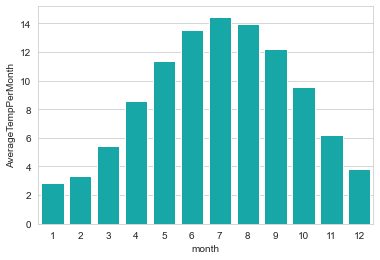

In [42]:
sns.barplot(x='month',y='AverageTempPerMonth',data=avg_per_month,color='c')

In [25]:
#  Create a DataFrame of how much hotter each month is than the average across all time. 
#i.e. How much hotter is January than the average day (from the first dot point)? 
#How much hotter is February than the average day (from the first dot point)? (etc. for each month).


In [43]:
#month_comparison=avg_per_month['Month']+avg_per_month['AverageTempPerMonth']+

month_comparison=pd.DataFrame(avg_per_month['AverageTempPerMonth'] -global_temp['LandAverageTemperature'].mean())

In [44]:
type(month_comparison)

pandas.core.frame.DataFrame

In [45]:
month_comparison_dataframe=pd.DataFrame(avg_per_month['month'])

In [46]:
type(month_comparison_dataframe)

pandas.core.frame.DataFrame

In [47]:
data = [month_comparison_dataframe,month_comparison]

headers=["Month","How much hotter"]

In [52]:
df3 = pd.concat(data, axis=1)
df3.columns=['month','Temp hotter than Avg']

In [53]:
df3

,month,Temp hotter than Avg
0,1,-5.937914
1,2,-5.432018
2,3,-3.369888
3,4,-0.225236
4,5,2.630182
5,6,4.777478
6,7,5.686747
7,8,5.195008
8,9,3.403851
9,10,0.761147


In [54]:
avg_per_month_final=pd.merge(avg_per_month,df3,how='inner',on='month')

In [55]:
avg_per_month_final

,Month,AverageTempPerMonth,Temp hotter than Avg
0,1,26.013052,4.266538
1,2,25.840514,4.093999
2,3,24.812717,3.066203
3,4,22.516035,0.769520
4,5,19.532583,-2.213932
5,6,17.010163,-4.736352
6,7,16.422014,-5.324501
7,8,17.892974,-3.853540
8,9,20.085380,-1.661135
9,10,22.175921,0.429407


In [68]:
# Question 2 - Seasonality correction (lookups)
# show the temperature of each day, a lookup of the monthly adjustment and the temperature of each day 
# with the monthly adjustment removed.


In [56]:
global_seasonality_correction=pd.merge(global_temp,avg_per_month_final,how='inner',on='month')

In [57]:
global_seasonality_correction

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year,month,day,YearMonth,AverageTempPerMonth,Temp hotter than Avg
0,1901-01-01,2.191,0.291,7.996,0.604,-3.491,0.490,13.290,0.141,1901,1,1,1901-1,2.826809,-5.937914
1,1902-01-01,2.684,0.256,8.797,0.569,-3.031,0.369,13.302,0.130,1902,1,1,1902-1,2.826809,-5.937914
2,1903-01-01,2.514,0.224,8.415,0.442,-3.187,0.403,13.275,0.128,1903,1,1,1903-1,2.826809,-5.937914
3,1904-01-01,1.637,0.387,7.082,0.516,-3.860,0.398,12.957,0.152,1904,1,1,1904-1,2.826809,-5.937914
4,1905-01-01,2.254,0.345,8.017,0.478,-3.324,0.373,13.205,0.140,1905,1,1,1905-1,2.826809,-5.937914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,2011-01-12,4.655,0.106,10.098,0.183,-0.641,0.133,14.198,0.063,2011,12,1,2011-12,3.813278,-4.951444
1376,2012-01-12,4.102,0.090,9.498,0.149,-1.162,0.096,14.138,0.064,2012,12,1,2012-12,3.813278,-4.951444
1377,2013-01-12,4.724,0.085,10.083,0.129,-0.548,0.105,14.339,0.065,2013,12,1,2013-12,3.813278,-4.951444
1378,2014-01-12,4.850,0.090,10.190,0.148,-0.331,0.123,14.410,0.062,2014,12,1,2014-12,3.813278,-4.951444


In [58]:
global_seasonality_correction["Adjusted temperature"]=global_seasonality_correction['LandAverageTemperature']-\
                                                        global_seasonality_correction['Temp hotter than Avg']

In [60]:
global_seasonality_correction[['LandAverageTemperature','Temp hotter than Avg','Adjusted temperature']]

,LandAverageTemperature,Temp hotter than Avg,Adjusted temperature
0,2.191,-5.937914,8.128914
1,2.684,-5.937914,8.621914
2,2.514,-5.937914,8.451914
3,1.637,-5.937914,7.574914
4,2.254,-5.937914,8.191914
...,...,...,...
1375,4.655,-4.951444,9.606444
1376,4.102,-4.951444,9.053444
1377,4.724,-4.951444,9.675444
1378,4.850,-4.951444,9.801444


In [74]:
# Create a data frame which has years as rows, and where the values are the averages of the adjusted temperatures(column 1)
# and the averages of the original temperatures  (column 2)

In [61]:
averages_of_adjusted_temperatures=global_seasonality_correction[['year','Adjusted temperature']].\
                                    groupby('year',as_index=False).mean()

In [62]:
averages_of_adjusted_temperatures.columns=['year','Averages of adjusted temperatures']

In [65]:
averages_of_original_temperatures=global_seasonality_correction[['year','LandAverageTemperature']].\
                                    groupby('year',as_index=False).mean()

In [79]:
averages_of_original_temperatures.columns=['year','Averages of original temperatures']

In [66]:
global_seasonality_correction=pd.merge(averages_of_adjusted_temperatures,averages_of_original_temperatures,on='year',how='inner')

In [68]:
global_seasonality_correction

,year,Averages of adjusted temperatures,LandAverageTemperature
0,1901,8.541917,8.541917
1,1902,8.304417,8.304417
2,1903,8.220167,8.220167
3,1904,8.090917,8.090917
4,1905,8.225167,8.225167
...,...,...,...
110,2011,9.516000,9.516000
111,2012,9.507333,9.507333
112,2013,9.606500,9.606500
113,2014,9.570667,9.570667


<AxesSubplot:xlabel='year', ylabel='Averages of adjusted temperatures'>

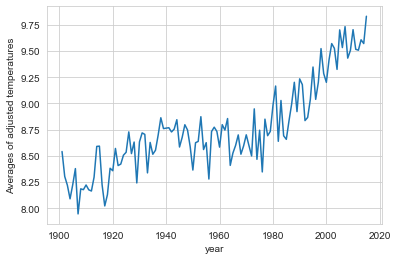

In [70]:
sns.lineplot(data=global_seasonality_correction,x='year',y='Averages of adjusted temperatures')

<AxesSubplot:xlabel='year', ylabel='LandAverageTemperature'>

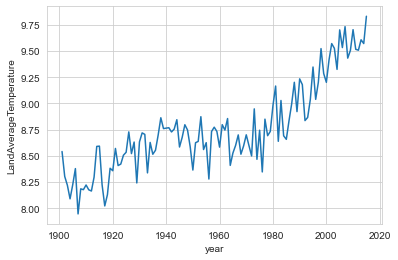

In [72]:
sns.lineplot(data=global_seasonality_correction,x='year',y='LandAverageTemperature')

In [75]:
final=global_temp[['year','month','LandAverageTemperature','LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty']]

In [77]:
final.to_csv('CleanedGlobal_Temperatures_Monthly.csv', sep=',',index=False)